# Titanic Survival Prediction: Exploratory Data Analysis (EDA)

This notebook provides an initial exploration of the Titanic dataset, which includes demographic and passenger information, to understand the structure of the data, detect missing values, and identify patterns.

---

In [52]:
import kagglehub
brendan45774_test_file_path = kagglehub.dataset_download('brendan45774/test-file')

print('Data source import complete.')

Data source import complete.


### Import Libraries

In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [54]:
csv_file_path = os.path.join(brendan45774_test_file_path, 'tested.csv')

In [55]:
tested = pd.read_csv(csv_file_path)

Display the first few rows of the dataset

In [56]:
tested.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Overview

In [57]:
# Check the shape of the dataset (rows, columns)
print(f"Dataset shape: {tested.shape}")
print("------------------------------------------")
# Summary of the data (data types, non-null values, etc.)
tested.info()
print("------------------------------------------")
# Get descriptive statistics of numerical features
tested.describe()

Dataset shape: (418, 12)
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
------------------------------------------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Check for Missing Values

In [58]:
missing_values = tested.isnull().sum()
missing_percentage = (missing_values / len(tested)) * 100

Display missing values and their percentage

In [59]:
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data.sort_values('Percentage', ascending=False)

,Missing Values,Percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


### Data Distribution

Distribution of Age

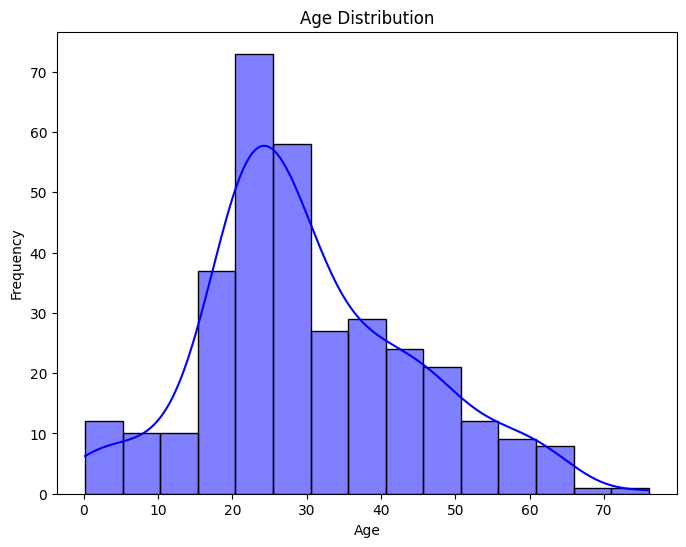

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(tested['Age'].dropna(), kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Distribution of Fare

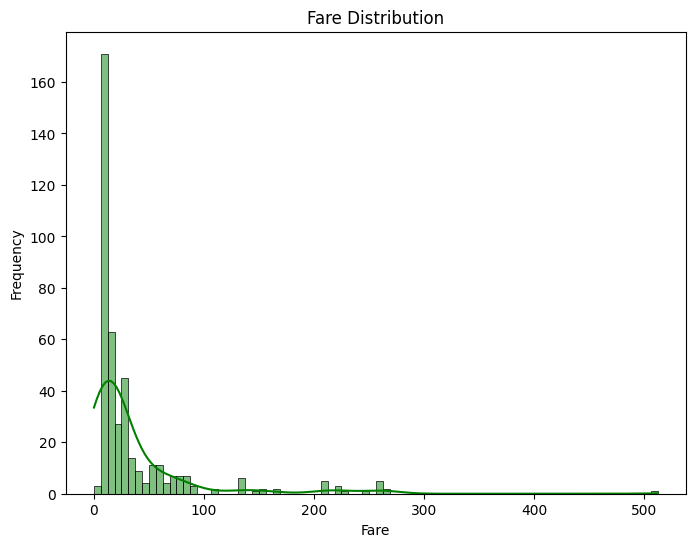

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(tested['Fare'], kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### Categorical Feature Analysis

Countplot for Pclass (Passenger Class)

<ipython-input-62-c79a0670d005>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=tested, palette='Set2')


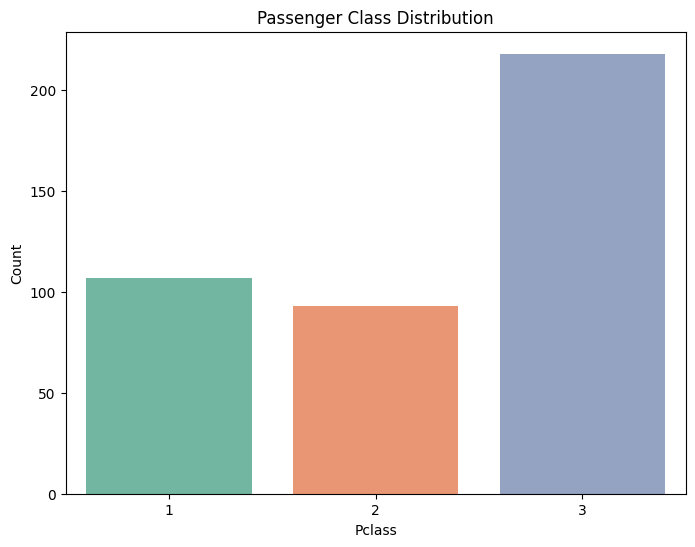

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=tested, palette='Set2')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

Countplot for Sex (Gender)

<ipython-input-63-b731ef9ea33c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=tested, palette='Set1')


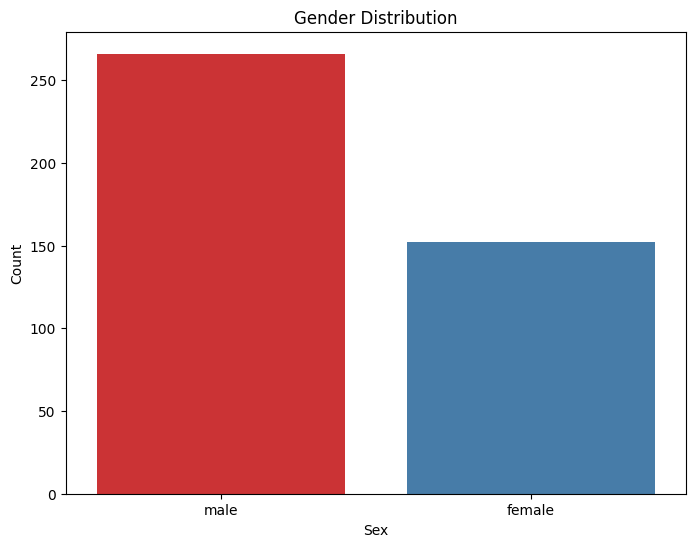

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=tested, palette='Set1')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Countplot for Embarked (Embarkation port)

<ipython-input-64-de2462017867>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=tested, palette='Set3')


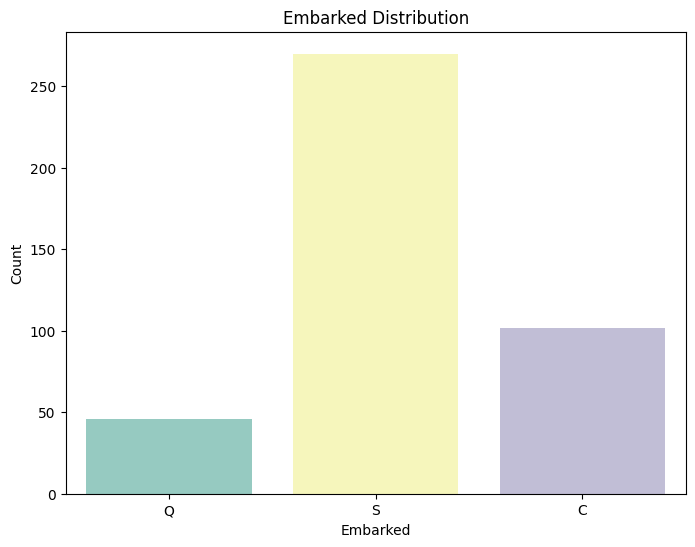

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=tested, palette='Set3')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

### Relationship Between Features and Survival

Survival rate based on Pclass

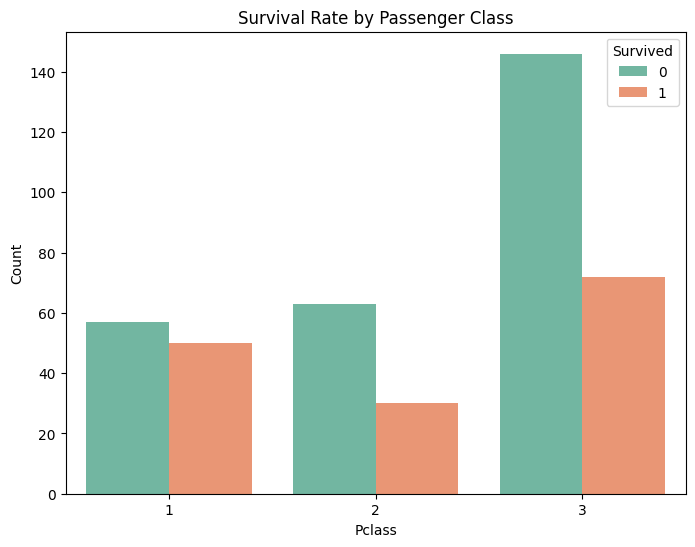

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=tested, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

Survival rate based on Sex

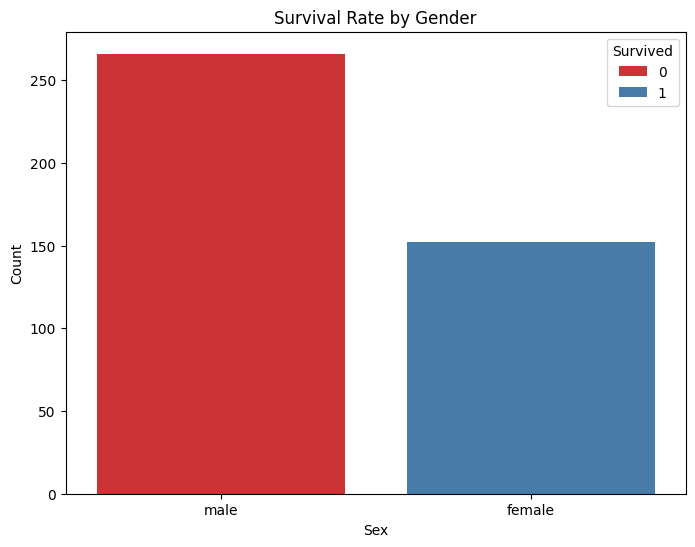

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=tested, palette='Set1')
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Survival rate based on Age

<ipython-input-67-3746564d5d65>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tested[tested['Survived'] == 1]['Age'], shade=True, color='green', label='Survived')
<ipython-input-67-3746564d5d65>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tested[tested['Survived'] == 0]['Age'], shade=True, color='red', label='Not Survived')


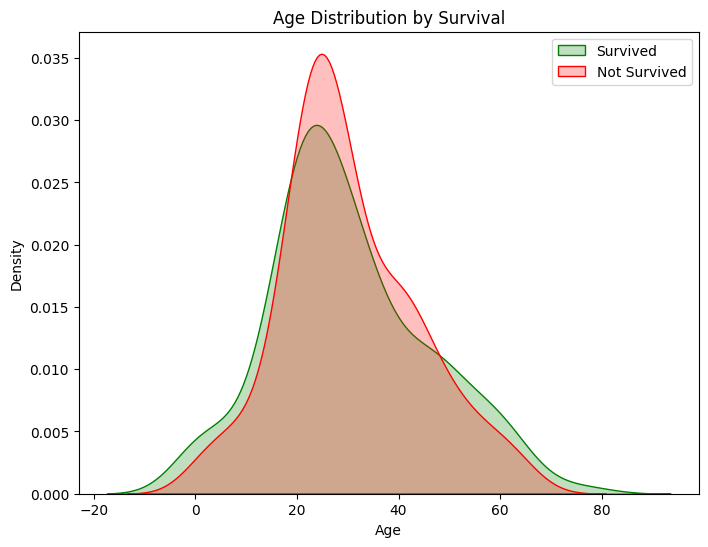

In [67]:
plt.figure(figsize=(8, 6))
sns.kdeplot(tested[tested['Survived'] == 1]['Age'], shade=True, color='green', label='Survived')
sns.kdeplot(tested[tested['Survived'] == 0]['Age'], shade=True, color='red', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Correlation Heatmap

Drop irrelevant columns for correlation analysis

In [68]:
tested_for_corr = tested.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

Convert categorical features to numerical using one-hot encoding

In [69]:
tested_for_corr = pd.get_dummies(tested_for_corr, columns=['Sex'], drop_first=True) # Convert 'Sex' to numerical

Compute correlation matrix

In [70]:
corr_matrix = tested_for_corr.corr()

Create a heatmap of the correlation matrix

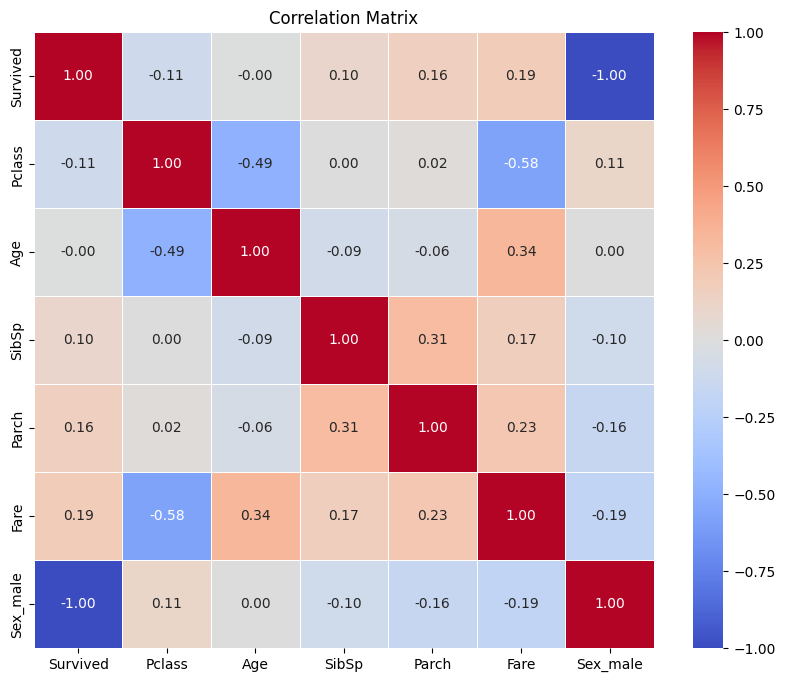

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Conclusion

In this notebook, we performed an initial exploration of the Titanic dataset:

- Checked the structure and missing values.

- Visualized distributions for numerical and categorical features.

- Analyzed how certain features relate to survival rates.